In [1]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt

In [2]:
N = 20

In [3]:
bert4rec_output_fp = "results/bert_baseline/test_results/test_output.csv"
srgnn_output_fp = "results/srgnn_baseline/test_results/test_output.csv"

In [4]:
bert4rec_df = pd.read_csv(bert4rec_output_fp)
sgnn_df = pd.read_csv(srgnn_output_fp)


In [5]:
bert4rec_df['top_20'] = bert4rec_df['top_20'].apply(ast.literal_eval)
sgnn_df['top_20'] = sgnn_df['top_20'].apply(ast.literal_eval)

In [7]:
bert4rec_df

,idx,time_var,time_avg,label,top_20,recall@1,recall@5,recall@10,recall@20,mrr
0,0,28.619045,4.428572,6,"[5, 2, 4, 3, 124, 1886, 9, 10, 80, 13, 139, 63...",0,0,0,0,0.000000
1,1,9.982143,1.625000,11,"[10, 9, 8, 7, 81, 46, 139, 180, 158, 386, 479,...",0,0,0,0,0.000000
2,2,0.285714,0.500000,12,"[12, 9, 14, 13, 2, 32, 10, 124, 31, 80, 3, 180...",1,1,1,1,1.000000
3,3,236.897461,12.692308,12,"[24, 23, 16, 196, 19, 20, 18, 107, 197, 30, 22...",0,0,0,0,0.000000
4,4,4.736394,1.183674,39,"[39, 40, 23, 38, 43, 35, 3, 46, 37, 19, 51, 2,...",1,1,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...
178945,178945,5.620553,1.565217,2001,"[58, 19, 10, 18, 23, 3, 71, 74, 2, 9, 256, 27,...",0,0,0,1,0.066667
178946,178946,4.571429,1.000000,210,"[224, 210, 49, 225, 63, 2137, 32, 122, 80, 226...",0,1,1,1,0.500000
178947,178947,522.666626,9.333334,288,"[480, 10, 3, 66, 288, 67, 65, 503, 81, 570, 29...",0,1,1,1,0.200000
178948,178948,14.122436,1.675000,40,"[19, 197, 36, 22, 23, 195, 24, 40, 39, 18, 387...",0,0,1,1,0.125000


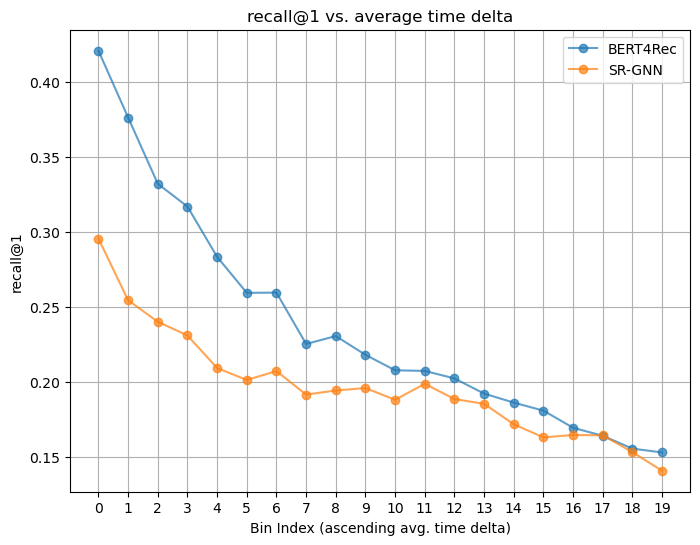

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample N value for the number of bins
N = 20  # replace with your actual number of bins

plt.figure(figsize=(8, 6))

# BERT4Rec: Create quantile-based bins (equal number of samples per bin)
bins_bert4rec = pd.qcut(bert4rec_df['time_avg'], q=N, labels=False)
# Group by the bins and calculate the mean of 'recall@5' for each bin
bin_means_bert4rec = bert4rec_df.groupby(bins_bert4rec)['recall@1'].mean()
# Plot the means as a line plot
bin_means_bert4rec.plot(kind='line', marker='o', linestyle='-', alpha=0.7, label="BERT4Rec")

# SR-GNN: Create quantile-based bins (equal number of samples per bin)
bins_sgnn = pd.qcut(sgnn_df['time_avg'], q=N, labels=False)
# Group by the bins and calculate the mean of 'recall@5' for each bin
bin_means_sgnn = sgnn_df.groupby(bins_sgnn)['recall@1'].mean()
# Plot the means as a line plot
bin_means_sgnn.plot(kind='line', marker='o', linestyle='-', alpha=0.7, label="SR-GNN")

# Add labels, title, and legend
plt.legend()
plt.title(f"recall@1 vs. average time delta")
plt.xlabel("Bin Index (ascending avg. time delta)")
plt.ylabel("recall@1")

# Set integer ticks for x-axis
plt.xticks(ticks=range(N), labels=range(N))  # Ensure ticks are integers for each bin

plt.grid(True)
plt.show()

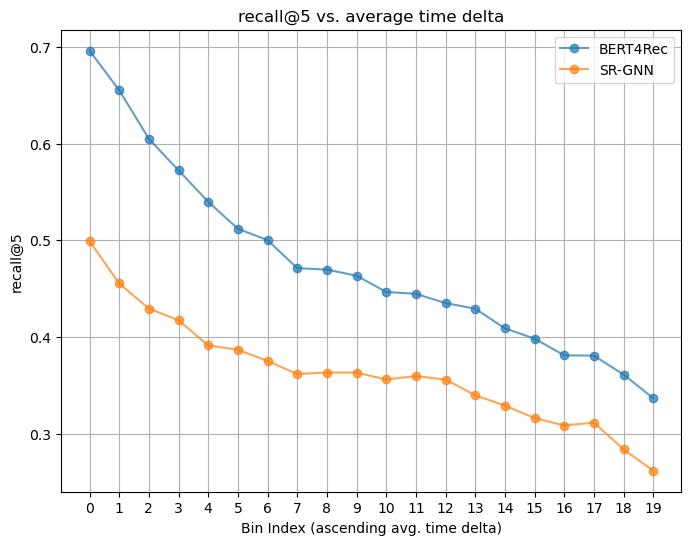

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample N value for the number of bins
N = 20  # replace with your actual number of bins

plt.figure(figsize=(8, 6))

# BERT4Rec: Create quantile-based bins (equal number of samples per bin)
bins_bert4rec = pd.qcut(bert4rec_df['time_avg'], q=N, labels=False)
# Group by the bins and calculate the mean of 'recall@5' for each bin
bin_means_bert4rec = bert4rec_df.groupby(bins_bert4rec)['recall@5'].mean()
# Plot the means as a line plot
bin_means_bert4rec.plot(kind='line', marker='o', linestyle='-', alpha=0.7, label="BERT4Rec")

# SR-GNN: Create quantile-based bins (equal number of samples per bin)
bins_sgnn = pd.qcut(sgnn_df['time_avg'], q=N, labels=False)
# Group by the bins and calculate the mean of 'recall@5' for each bin
bin_means_sgnn = sgnn_df.groupby(bins_sgnn)['recall@5'].mean()
# Plot the means as a line plot
bin_means_sgnn.plot(kind='line', marker='o', linestyle='-', alpha=0.7, label="SR-GNN")

# Add labels, title, and legend
plt.legend()
plt.title(f"recall@5 vs. average time delta")
plt.xlabel("Bin Index (ascending avg. time delta)")
plt.ylabel("recall@5")

# Set integer ticks for x-axis
plt.xticks(ticks=range(N), labels=range(N))  # Ensure ticks are integers for each bin

plt.grid(True)
plt.show()

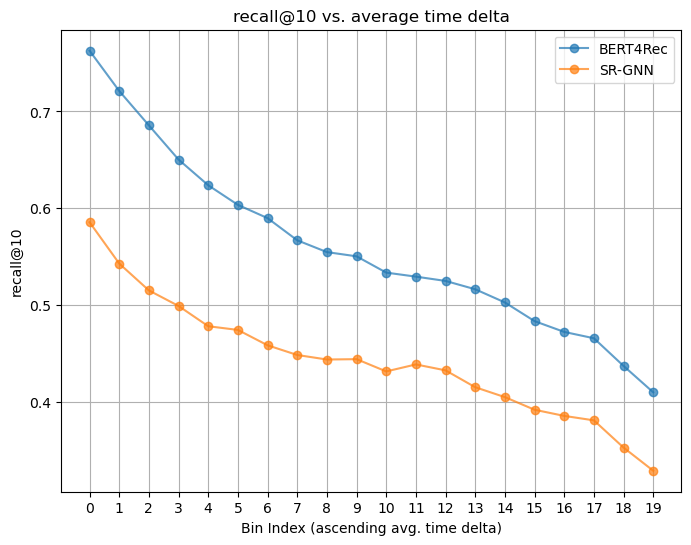

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample N value for the number of bins
N = 20  # replace with your actual number of bins

plt.figure(figsize=(8, 6))

# BERT4Rec: Create quantile-based bins (equal number of samples per bin)
bins_bert4rec = pd.qcut(bert4rec_df['time_avg'], q=N, labels=False)
# Group by the bins and calculate the mean of 'recall@5' for each bin
bin_means_bert4rec = bert4rec_df.groupby(bins_bert4rec)['recall@10'].mean()
# Plot the means as a line plot
bin_means_bert4rec.plot(kind='line', marker='o', linestyle='-', alpha=0.7, label="BERT4Rec")

# SR-GNN: Create quantile-based bins (equal number of samples per bin)
bins_sgnn = pd.qcut(sgnn_df['time_avg'], q=N, labels=False)
# Group by the bins and calculate the mean of 'recall@5' for each bin
bin_means_sgnn = sgnn_df.groupby(bins_sgnn)['recall@10'].mean()
# Plot the means as a line plot
bin_means_sgnn.plot(kind='line', marker='o', linestyle='-', alpha=0.7, label="SR-GNN")

# Add labels, title, and legend
plt.legend()
plt.title(f"recall@10 vs. average time delta")
plt.xlabel("Bin Index (ascending avg. time delta)")
plt.ylabel("recall@10")

# Set integer ticks for x-axis
plt.xticks(ticks=range(N), labels=range(N))  # Ensure ticks are integers for each bin

plt.grid(True)
plt.show()

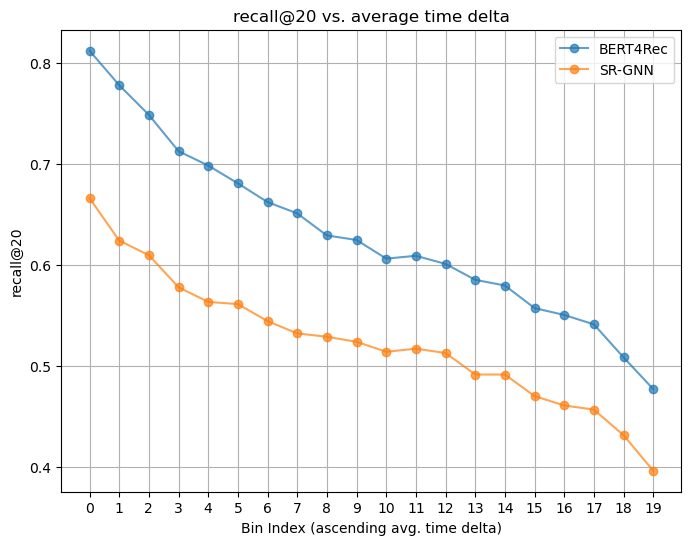

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample N value for the number of bins
N = 20  # replace with your actual number of bins

plt.figure(figsize=(8, 6))

# BERT4Rec: Create quantile-based bins (equal number of samples per bin)
bins_bert4rec = pd.qcut(bert4rec_df['time_avg'], q=N, labels=False)
# Group by the bins and calculate the mean of 'recall@5' for each bin
bin_means_bert4rec = bert4rec_df.groupby(bins_bert4rec)['recall@20'].mean()
# Plot the means as a line plot
bin_means_bert4rec.plot(kind='line', marker='o', linestyle='-', alpha=0.7, label="BERT4Rec")

# SR-GNN: Create quantile-based bins (equal number of samples per bin)
bins_sgnn = pd.qcut(sgnn_df['time_avg'], q=N, labels=False)
# Group by the bins and calculate the mean of 'recall@5' for each bin
bin_means_sgnn = sgnn_df.groupby(bins_sgnn)['recall@20'].mean()
# Plot the means as a line plot
bin_means_sgnn.plot(kind='line', marker='o', linestyle='-', alpha=0.7, label="SR-GNN")

# Add labels, title, and legend
plt.legend()
plt.title(f"recall@20 vs. average time delta")
plt.xlabel("Bin Index (ascending avg. time delta)")
plt.ylabel("recall@20")

# Set integer ticks for x-axis
plt.xticks(ticks=range(N), labels=range(N))  # Ensure ticks are integers for each bin

plt.grid(True)
plt.show()

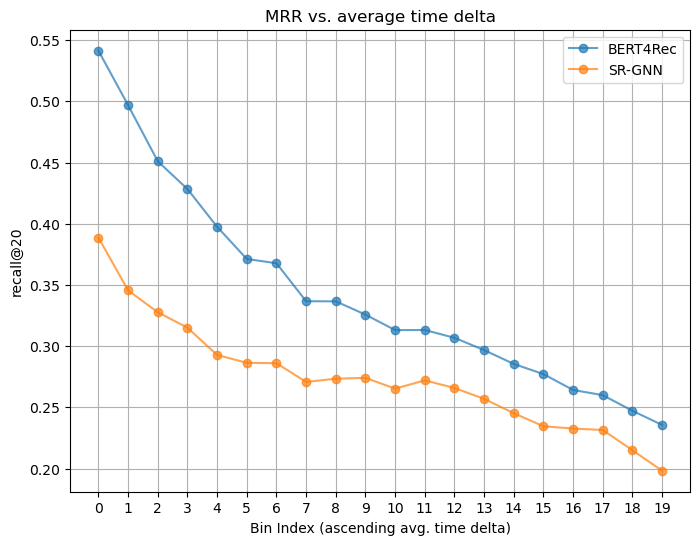

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample N value for the number of bins
N = 20  # replace with your actual number of bins

plt.figure(figsize=(8, 6))

# BERT4Rec: Create quantile-based bins (equal number of samples per bin)
bins_bert4rec = pd.qcut(bert4rec_df['time_avg'], q=N, labels=False)
# Group by the bins and calculate the mean of 'recall@5' for each bin
bin_means_bert4rec = bert4rec_df.groupby(bins_bert4rec)['mrr'].mean()
# Plot the means as a line plot
bin_means_bert4rec.plot(kind='line', marker='o', linestyle='-', alpha=0.7, label="BERT4Rec")

# SR-GNN: Create quantile-based bins (equal number of samples per bin)
bins_sgnn = pd.qcut(sgnn_df['time_avg'], q=N, labels=False)
# Group by the bins and calculate the mean of 'recall@5' for each bin
bin_means_sgnn = sgnn_df.groupby(bins_sgnn)['mrr'].mean()
# Plot the means as a line plot
bin_means_sgnn.plot(kind='line', marker='o', linestyle='-', alpha=0.7, label="SR-GNN")

# Add labels, title, and legend
plt.legend()
plt.title(f"MRR vs. average time delta")
plt.xlabel("Bin Index (ascending avg. time delta)")
plt.ylabel("recall@20")

# Set integer ticks for x-axis
plt.xticks(ticks=range(N), labels=range(N))  # Ensure ticks are integers for each bin

plt.grid(True)
plt.show()